In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Fish dataset from CSV file
fish = pd.read_csv("Fish_dataset.csv")

In [3]:
# Data Test
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


<AxesSubplot:>

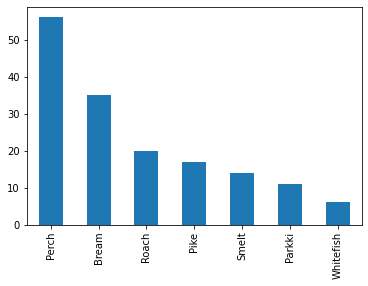

In [4]:
# Task 1 : Plot a bar chart showing count of individual species.
fish['Species'].value_counts().plot(kind='bar')

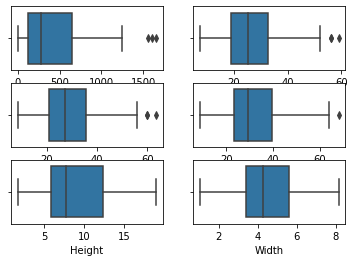

In [6]:
# Task 2 : Identify outliers and remove if any.
plt.subplot(3,2,1)
sbn.boxplot(fish['Weight'])
plt.subplot(3,2,2)
sbn.boxplot(fish['Length1'])
plt.subplot(3,2,3)
sbn.boxplot(fish['Length2'])
plt.subplot(3,2,4)
sbn.boxplot(fish['Length3'])
plt.subplot(3,2,5)
sbn.boxplot(fish['Height'])
plt.subplot(3,2,6)
sbn.boxplot(fish['Width'])
plt.show()

In [7]:
# Outliers Present : Weight , Length1 , Length2 , Length3

In [14]:
# Funtion to generate summary report
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [11]:
# Removing Target Variable : Species
fish_new = fish.iloc[:,1:]

In [12]:
# Data Test
fish_new.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [15]:
# Getting Summary Report of altered fish dataset
fish_new.apply(lambda x:var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Weight,159.0,0.0,63333.9000,398.326415,273.0000,357.978317,128148.475121,0.0000,6.364000,9.80000,29.58000,120.00000,273.0000,650.0000,930.0000,1000.00000,1571.000000,1650.000
Length1,159.0,0.0,4173.3000,26.247170,25.2000,9.996441,99.928837,7.5000,9.706000,11.30000,13.44000,19.05000,25.2000,32.7000,38.2000,41.19000,56.000000,59.000
Length2,159.0,0.0,4518.1000,28.415723,27.3000,10.716328,114.839688,8.4000,10.206000,11.80000,14.62000,21.00000,27.3000,35.5000,41.2000,44.10000,60.000000,63.400
Length3,159.0,0.0,4965.1000,31.227044,29.4000,11.610246,134.797808,8.8000,11.264000,13.10000,16.16000,23.15000,29.4000,39.6500,45.3400,46.74000,64.000000,68.000
Height,159.0,0.0,1426.3880,8.970994,7.7860,4.286208,18.371576,1.7284,1.874056,2.20356,3.76480,5.94480,7.7860,12.3659,15.1904,16.37732,18.685296,18.957
Width,159.0,0.0,702.3802,4.417486,4.2485,1.685804,2.841935,1.0476,1.148400,1.28314,2.22784,3.38565,4.2485,5.5845,6.7421,7.28462,7.679758,8.142


In [16]:
# Clipping Data Outliers from fields : Weight , Length1, Length2, Length3
fish_new['Weight']=fish_new['Weight'].clip(fish_new['Weight'].quantile(0.01),fish_new['Weight'].quantile(0.99))
fish_new['Length1']=fish_new['Length1'].clip(fish_new['Length1'].quantile(0.01),fish_new['Length1'].quantile(0.99))
fish_new['Length2']=fish_new['Length2'].clip(fish_new['Length2'].quantile(0.01),fish_new['Length2'].quantile(0.99))
fish_new['Length3']=fish_new['Length3'].clip(fish_new['Length3'].quantile(0.01),fish_new['Length3'].quantile(0.99))

<AxesSubplot:xlabel='Weight', ylabel='Density'>

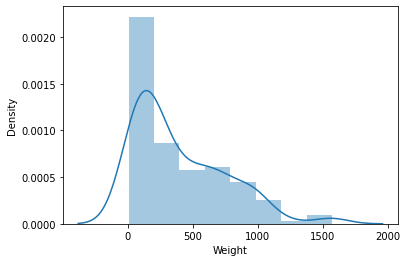

In [17]:
# Visualization : Weight
sbn.distplot(fish_new['Weight'])

<AxesSubplot:xlabel='Length1', ylabel='Density'>

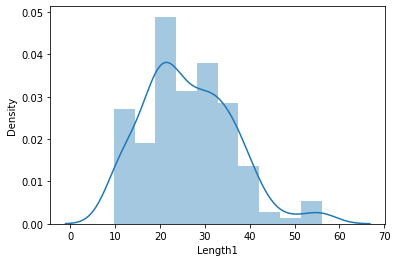

In [18]:
# Visualization : Length1
sbn.distplot(fish_new['Length1'])

<AxesSubplot:xlabel='Length2', ylabel='Density'>

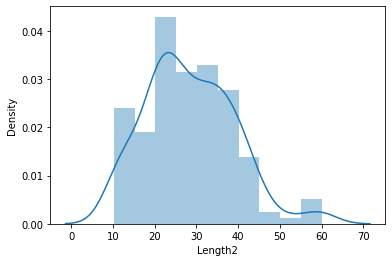

In [19]:
# Visualization : Length2
sbn.distplot(fish_new['Length2'])

<AxesSubplot:xlabel='Length3', ylabel='Density'>

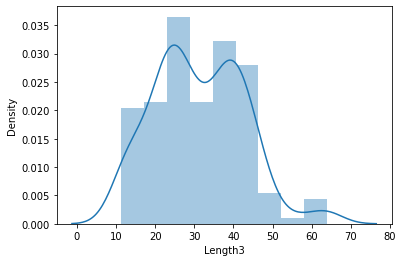

In [20]:
# Visualization : Length3
sbn.distplot(fish_new['Length3'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

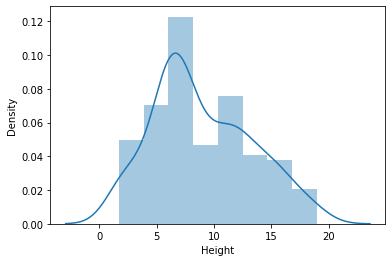

In [21]:
# Visualization : Height
sbn.distplot(fish_new['Height'])

<AxesSubplot:xlabel='Width', ylabel='Density'>

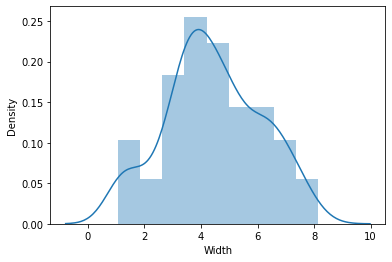

In [22]:
# Visualization : Width
sbn.distplot(fish_new['Width'])

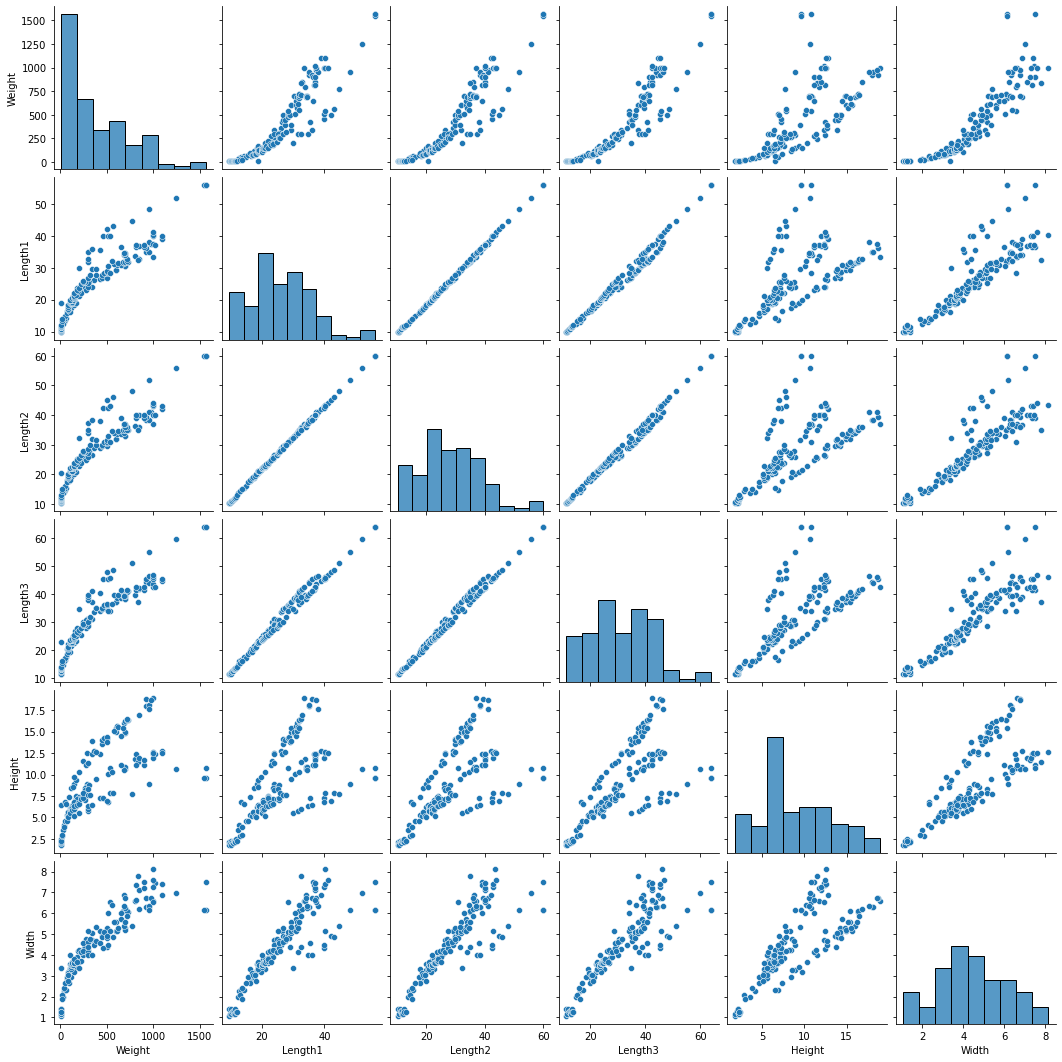

In [23]:
# Visualization : New Fish Dataset
sbn.pairplot(fish_new)

In [24]:
# New Fish Dataset Correlation
fish_new.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915581,0.918322,0.922943,0.728389,0.889215
Length1,0.915581,1.000000,0.999500,0.991842,0.627461,0.868297
Length2,0.918322,0.999500,1.000000,0.993988,0.642989,0.875030
Length3,0.922943,0.991842,0.993988,1.000000,0.706586,0.879987
Height,0.728389,0.627461,0.642989,0.706586,1.000000,0.792881
Width,0.889215,0.868297,0.875030,0.879987,0.792881,1.000000


<AxesSubplot:>

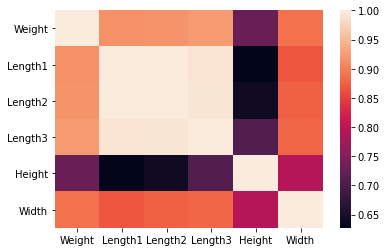

In [26]:
# New Fish Dataset Correlation Heatmap
sbn.heatmap(fish_new.corr())

In [27]:
# Task 2 Conclusion :
# 1. There is a strong correlation between Length1 - Length2 - Length3 independent variables.
# 2. Keeping [1] in mind, we will use only one Length , Height and Width for determination of Weight.

In [28]:
# Creating new dataset keeping Task 2 Conclusion in mind
fish_data = fish_new[['Weight','Length1','Height','Width']]

In [29]:
# Data Test
fish_data.head()

,Weight,Length1,Height,Width
0,242.0,23.2,11.5200,4.0200
1,290.0,24.0,12.4800,4.3056
2,340.0,23.9,12.3778,4.6961
3,363.0,26.3,12.7300,4.4555
4,430.0,26.5,12.4440,5.1340


<AxesSubplot:ylabel='Density'>

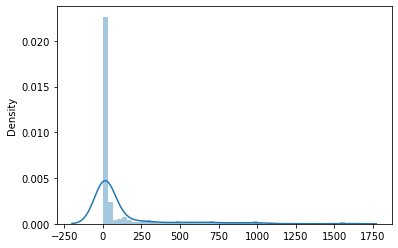

In [30]:
# Visualization : New Fish Data
sbn.distplot(fish_data)

In [50]:
# Instantiating : MinMaxScaler Object
mms = MinMaxScaler()

In [34]:
fish_data_new = mms.fit_transform(fish_data)
fd_new = pd.DataFrame(fish_data_new)

In [35]:
# Data Test
fd_new.head()

,0,1,2,3
0,0.150601,0.291485,0.568334,0.418978
1,0.181279,0.308766,0.624055,0.459235
2,0.213236,0.306606,0.618123,0.514279
3,0.227935,0.358448,0.638566,0.480365
4,0.270757,0.362768,0.621966,0.576004


<AxesSubplot:ylabel='Density'>

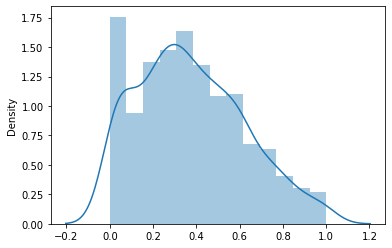

In [36]:
# Visualization : fd_new
sbn.distplot(fd_new)

In [40]:
# Task 3 : Build a regression model and print regression equation.
X = fd_new.iloc[:,1:]
Y = fd_new.iloc[:,:1]

In [41]:
# Data Test : X
X

,1,2,3
0,0.291485,0.568334,0.418978
1,0.308766,0.624055,0.459235
2,0.306606,0.618123,0.514279
3,0.358448,0.638566,0.480365
4,0.362768,0.621966,0.576004
...,...,...,...
154,0.038752,0.021012,0.048771
155,0.043073,0.040723,0.031208
156,0.051713,0.031842,0.029347
157,0.075474,0.066424,0.143719


In [42]:
# Data Test : Y
Y

,0
0,0.150601
1,0.181279
2,0.213236
3,0.227935
4,0.270757
...,...
154,0.003730
155,0.004497
156,0.003730
157,0.008523


In [43]:
# Splitting X and Y into testing and training datasets
X_train , X_test , Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=20)

In [46]:
# Data Test : X Training
print(X_train.shape)
X_train.head()

(127, 3)


,1,2,3
66,0.200760,0.395227,0.316700
46,0.243963,0.279860,0.321014
108,0.390850,0.341711,0.524921
102,0.334687,0.382771,0.576469
104,0.339007,0.308975,0.463380


In [47]:
# Data Test : X Testing
print(X_test.shape)
X_test.head()

(32, 3)


,1,2,3
147,0.008511,0.000000,0.014208
57,0.343327,0.409180,0.512235
98,0.278524,0.290505,0.439530
88,0.222361,0.254321,0.349205
135,0.654383,0.295822,0.480858


In [48]:
# Data Test : Y Training
print(Y_train.shape)
Y_train.head()

(127, 1)


,0
66,0.085410
46,0.085410
108,0.200453
102,0.187670
104,0.165301


In [49]:
# Data Test : Y Testing
print(Y_test.shape)
Y_test.head()

(32, 1)


,0
147,0.000406
57,0.191505
98,0.116088
88,0.079019
135,0.321887


In [52]:
# Instantiating : linear Regression Object
lr = LinearRegression()

In [54]:
# Training Linear Regression Model
lr.fit(X_train,Y_train)

LinearRegression()

In [73]:
# Pedicting Y using X test data
Y_predicted = lr.predict(X_test)
Y_predicted

array([[-0.13837148],
       [ 0.24723871],
       [ 0.1716003 ],
       [ 0.11058527],
       [ 0.41589136],
       [ 0.54954486],
       [ 0.10622403],
       [ 0.71019599],
       [ 0.20292531],
       [ 0.25220764],
       [ 0.14943626],
       [ 0.33066177],
       [-0.04288331],
       [ 0.52192227],
       [ 0.13676587],
       [-0.06250173],
       [ 0.15473324],
       [ 0.46731436],
       [ 0.41400809],
       [ 0.58852434],
       [ 0.48541921],
       [ 0.35973046],
       [-0.10651847],
       [ 0.05653468],
       [ 0.50838578],
       [ 0.28431126],
       [ 0.18013141],
       [ 0.12676968],
       [ 0.12992476],
       [ 0.36701009],
       [ 0.0201618 ],
       [ 0.41092273]])

In [67]:
# Linear Regression : Coefficients
print("Length1 : {:.4f}".format(lr.coef_[0][0]))
print("Height  : {:.4f}".format(lr.coef_[0][1]))
print("Width   : {:.4f}".format(lr.coef_[0][2]))

Length1 : 0.6231
Height  : 0.1599
Width   : 0.2241


In [64]:
# Linear Regression : Intercept
print("Intercept : {:.4f}".format(lr.intercept_[0]))

Intercept : -0.1469


In [68]:
# Regression Equation
# Weight = (0.6231 * Length1) + (0.1599 * Height) + (0.2241 * Width) - 0.1469

In [77]:
# Task 4 : What is the mean score of the model at 95% confidence interval?
rm_sq_err = np.sqrt(metrics.mean_squared_error(Y_test , Y_predicted))
rm_sq_err

0.08297372357539445

In [82]:
Y_pred_train = lr.predict(X_train)
rm_sq_err_train = np.sqrt(metrics.mean_squared_error( Y_train, Y_pred_train))
rm_sq_err_train

0.07579113283250274

In [83]:
# Task 5 : Compare real and predicted weights and give a conclusion statement based on it?
metrics.r2_score(Y_train,Y_pred_train)

0.8846912042525455

In [84]:
metrics.r2_score(Y_test,Y_predicted)

0.8798412920600949

In [85]:
# Task 5 Conclusion : 
# 1. By comparing the above scores it is certain that the model does generate acceptable results with low error.
# 2. To increase the accuracy of regression model more datapoints can be introduced.
